Exploratory Data Analysis
=============

### 01 - Introduction

In this notebook we will make a Exploratory Data Analysis with the following goals in mind:

* Process the variables for feeding machine learning model/s.
* Analyze the features of our clean data in order to understand the relationship between them.
* Answer the following questions:
    1. Es mejor
    2. Es peor
    3. Es igual

__Importing Libraries__

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.style.use("ggplot")
import seaborn as sns
from matplotlib import rcParams

%matplotlib inline
# figure size
rcParams['figure.figsize'] = 11,6

### 02 - Knowing our data

Reading data:

In [99]:
loans = pd.read_csv("../data/clean/loans.csv", sep = "^")

In [100]:
loans.head(10)

,funded_amnt_inv,term,issue_d,installment,int_rate,grade,emp_title,emp_length,annual_inc,title,dti,home_ownership,zip_code,addr_state,last_pymnt_amnt,total_pymnt_inv,total_rec_late_fee,application_type,total_acc,loan_status
0,10000.0,60 months,Mar-2016,262.34,19.53%,D,lpn/charge nurse,4 years,52000.0,Other,15.00,OWN,317xx,GA,9575.49,11127.83,0.0,Individual,12.0,Fully Paid
1,35000.0,60 months,Mar-2016,941.96,20.75%,E,Coiler,3 years,85000.0,Debt consolidation,24.98,MORTGAGE,144xx,NY,509.10,37226.47,0.0,Individual,19.0,Fully Paid
2,20000.0,60 months,Mar-2016,416.73,9.16%,B,Reliability Engineer,1 year,77000.0,Home improvement,13.75,MORTGAGE,606xx,IL,416.73,9147.70,0.0,Individual,19.0,Current
3,17475.0,60 months,Mar-2016,384.06,11.47%,B,NaN,NaN,41682.0,Debt consolidation,30.06,MORTGAGE,796xx,TX,384.06,8432.61,0.0,Individual,18.0,Current
4,8000.0,36 months,Mar-2016,255.00,9.16%,B,Technician,10+ years,72000.0,Debt consolidation,22.63,RENT,217xx,MD,255.00,5601.86,0.0,Individual,12.0,Current
5,14400.0,36 months,Mar-2016,469.74,10.75%,B,Coder,10+ years,85000.0,Business,28.11,MORTGAGE,037xx,NH,10992.93,15673.13,0.0,Individual,33.0,Fully Paid
6,18000.0,60 months,Mar-2016,400.31,11.99%,C,Registered Nurse,6 years,100000.0,Debt consolidation,20.41,MORTGAGE,986xx,WA,14885.49,20465.85,0.0,Individual,40.0,Fully Paid
7,5800.0,36 months,Mar-2016,191.18,11.47%,B,shipping,2 years,21000.0,NaN,16.91,RENT,799xx,TX,191.18,4198.57,0.0,Individual,10.0,Current
8,12500.0,60 months,Mar-2016,293.85,14.46%,C,Occupational Therapist Assisstant,1 year,91000.0,Debt consolidation,11.83,RENT,270xx,NC,293.85,6444.62,0.0,Individual,15.0,Current
9,3000.0,36 months,Mar-2016,93.17,7.39%,A,account sales manager,10+ years,90000.0,Home improvement,1.23,MORTGAGE,184xx,PA,93.17,2047.58,0.0,Individual,25.0,Current


In [101]:
loans.shape

(1765426, 20)

Variable types:

In [102]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765426 entries, 0 to 1765425
Data columns (total 20 columns):
funded_amnt_inv       float64
term                  object
issue_d               object
installment           float64
int_rate              object
grade                 object
emp_title             object
emp_length            object
annual_inc            float64
title                 object
dti                   float64
home_ownership        object
zip_code              object
addr_state            object
last_pymnt_amnt       float64
total_pymnt_inv       float64
total_rec_late_fee    float64
application_type      object
total_acc             float64
loan_status           object
dtypes: float64(8), object(12)
memory usage: 269.4+ MB


In [106]:
loans.isnull().sum()

funded_amnt_inv            0
term                       0
issue_d                    0
installment                0
int_rate                   0
grade                      0
emp_title             112310
emp_length            104920
annual_inc                 4
title                  23325
dti                      579
home_ownership             0
zip_code                   1
addr_state                 0
last_pymnt_amnt            0
total_pymnt_inv            0
total_rec_late_fee         0
application_type           0
total_acc                 29
loan_status                0
dtype: int64

### 03 - Preprocessing

__Loan Status__:

In [103]:
loans['loan_status'].value_counts()

Current                                                843754
Fully Paid                                             698690
Charged Off                                            182199
Late (31-120 days)                                      21742
In Grace Period                                         11812
Late (16-30 days)                                        4423
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Default                                                    57
Name: loan_status, dtype: int64

`loan_status` is the current status of the loan. This is the variable we want to predict in our machine learning model. For this variable, we are going to considerar three labels:
- 0: loans that have already been paid.
- 1: default or charged off loans.
- 2: current loans (rest of the cases), where we don't know if they are going to be paid or not.

We will use labels 0 and 1 for training and testing our model. Label 2 is going to use just for predicting.

In [104]:
def process_loan_status(loan_status):
    
    loan_status_dict = {
    "Current": 2,
    "Fully Paid": 0,
    "Charged Off": 1,
    "Late (31-120 days)": 2,
    "In Grace Period": 2,
    "Late (16-30 days)": 2,
    "Does not meet the credit policy. Status:Fully Paid": 0,
    "Does not meet the credit policy. Status:Charged Off": 1,
    "Default": 1
    }
    
    return loan_status_dict[loan_status]

In [105]:
loans['loan_status'] = loans['loan_status'].map(process_loan_status).\
                            astype('category')

### 04 - Loan Status Analysis

Since one of our project main goals is to predict whether a debt is going to be paid or not, this part of the analysis will focus on `loan_status` variable, i. e., the current status of the loan.

__Loan status distribution__:

In [7]:
loans['loan_status'].value_counts()

Current                                                843754
Fully Paid                                             698690
Charged Off                                            182199
Late (31-120 days)                                      21742
In Grace Period                                         11812
Late (16-30 days)                                        4423
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Default                                                    57
Name: loan_status, dtype: int64

We are going to consider _Does not meet the credit policy. Status:Fully Paid_ as `Fully Paid` and _Does not meet the credit policy. Status:Charged Off_ as `Charged Off` although the do not meet the credit policy.

In [8]:
loans.loc[loans['loan_status']=="Does not meet the credit policy. Status:Fully Paid", 'loan_status'] = "Fully Paid"
loans.loc[loans['loan_status']=="Does not meet the credit policy. Status:Charged Off", 'loan_status'] = "Charged Off"

In [9]:
loans['loan_status'].value_counts()

Current               843754
Fully Paid            700678
Charged Off           182960
Late (31-120 days)     21742
In Grace Period        11812
Late (16-30 days)       4423
Default                   57
Name: loan_status, dtype: int64

Let's plot the distribution in a barplot:

Text(0.5,1,'Loan Status Count')

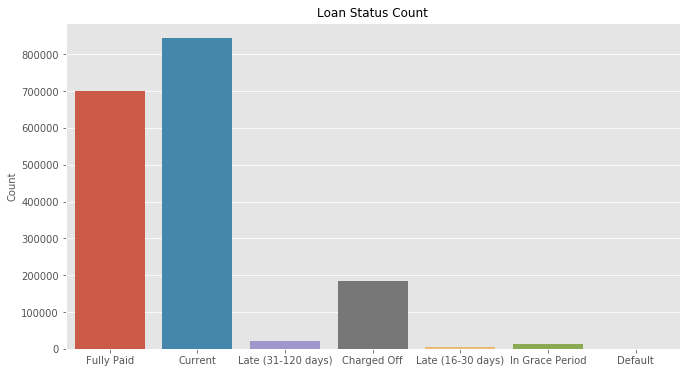

In [22]:
g = sns.countplot(x="loan_status", data=loans)

g.set_xlabel("", fontsize=6)
g.set_ylabel("Count", fontsize=10)
g.set_title("Loan Status Count", fontsize=12)

__Loan status by funded amount__

Text(0.5,1,'Loan Amount distribution by Status')

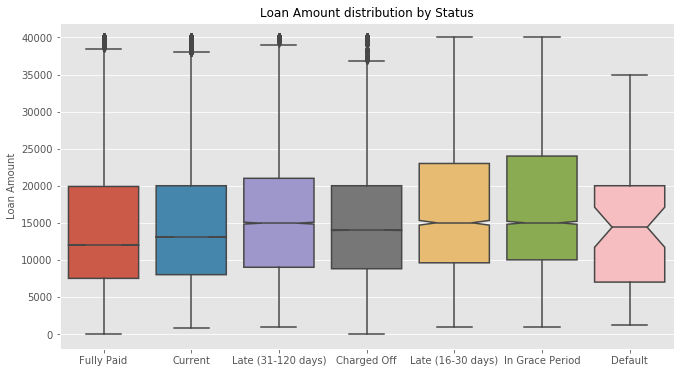

In [26]:
g = sns.boxplot(x="loan_status", y="funded_amnt_inv", 
                data=loans, notch = True) # notch for showing 95% confidence interval for the median

g.set_xlabel("", fontsize=6)
g.set_ylabel("Loan Amount", fontsize=10)
g.set_title("Loan Amount distribution by Status", fontsize=12)

It seems that there is not evidence that _default_ loan amounts are higher or lower than the _fully paid_. 

__Loan status by year__

For this analysis we have to preprocess the `issue_d` variable. We are only interested in the year of the loan and we will not consider it as date or numeric variable but categorical:

In [29]:
loans['issue_d'] = loans['issue_d'].map(lambda x: x[4:])

Text(0.5,1,'Loan Status by Year')

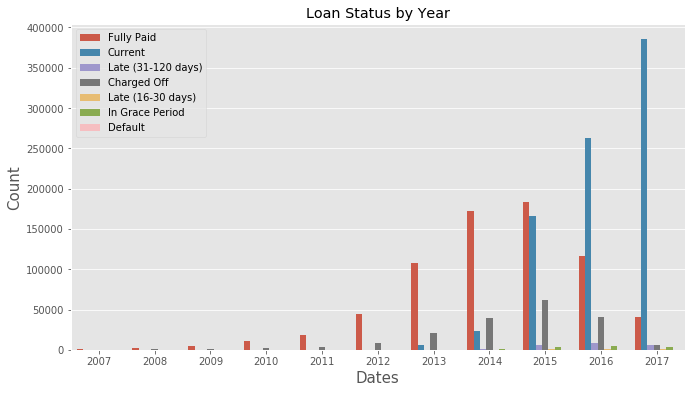

In [30]:
g = sns.countplot(x='issue_d', data=loans,
                  hue='loan_status')

g.set_xlabel("Dates", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.legend(loc="upper left")
g.set_title("Loan Status by Year")

Although the number of issued loans has been increased exponentially since 2007, the ratio between those loans that have been paid and those that have not been paid seems to be unvariable regardless of the year and the amount of issued loans.

__Unpaid loans by Year__

In [43]:
loans[(loans['loan_status']=="Charged Off") | (loans['loan_status']=="Default")].shape

(183017, 20)

Text(0.5,1,'Defaults by Year')

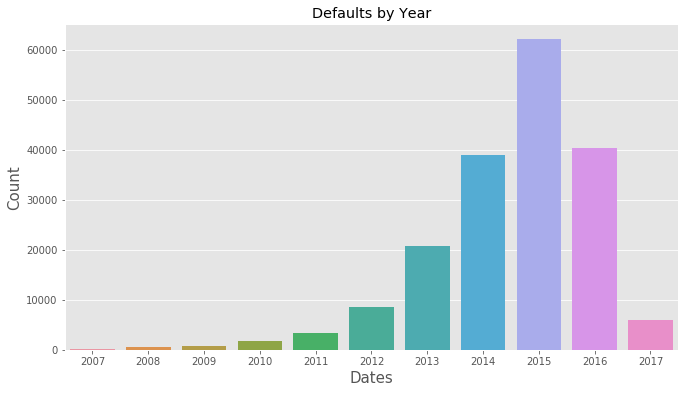

In [47]:
g = sns.countplot(x="issue_d", data=loans[(loans['loan_status']=="Charged Off") | 
                                          (loans['loan_status']=="Default")])

g.set_xlabel("Dates", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_title("Defaults by Year")

__Purpuse of the loan__

In [ ]:
def crosstab(variable_1, variable_2):
    return variable_1, 

In [69]:
loans['home_ownership'].value_counts()

MORTGAGE    872230
RENT        699523
OWN         192929
ANY            508
OTHER          182
NONE            54
Name: home_ownership, dtype: int64

In [70]:
pd.crosstab(loans['home_ownership'], loans['loan_status']).\
    style.background_gradient(cmap=sns.light_palette("green", as_cmap=True))

loan_status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
home_ownership,,,,,,,,,
ANY,20,378,0,0,0,93,5,1,11
MORTGAGE,78256,415339,18,348,908,360587,5502,2054,9218
NONE,7,3,0,1,4,39,0,0,0
OTHER,27,0,0,11,27,117,0,0,0
OWN,19502,98088,8,49,138,70680,1322,587,2555
RENT,84387,329946,31,352,911,267174,4983,1781,9958


### 04 - Preprocessing Variables --> UNCOMPLETE!!!!

Now, we are going to preprocess variables for exploring data. For this part, we will only distinguish between numeric and categorical varibles. 

#### 03.1 - Numeric Variables

__int_rate__ (interest rate)

We have to take the number without the percentage symbol and then transform to float:

In [78]:
loans['int_rate'] = loans['int_rate'].map(lambda x: float(x[:-1]))

Transform the rest of __numeric__ variables:

In [80]:
numeric_variables = ['funded_amnt_inv', 'installment', 'annual_inc', 'dti', 
                     'last_pymnt_amnt', 'total_pymnt_inv']

In [81]:
loans[numeric_variables] = loans[numeric_variables].astype('float')

__total_rec_late_fee__ (late fees received to date)

This is the only integer variable in the dataset:

In [91]:
#integer_variables = ['total_rec_late_fee', 'total_acc']

In [92]:
loans['total_rec_late_fee'] = loans['total_rec_late_fee'].astype(int)

#### 03.2 - Categorical Variables

__zip_code__ 

This variable represents only the first 3 numbers of the zip code provided by the borrower in the loan application. So we have to take remove the last two 'xx':

In [82]:
loans['zip_code'] = loans['zip_code'].map(lambda x: str(x)[:3])

Transform the rest of __categorical__ variables (except `loan_status`):

In [87]:
categorical_variables = ['term', 'grade', 'emp_title', 'emp_length', 'title', 
                         'home_ownership', 'zip_code', 'addr_state', 'application_type']

In [88]:
loans[categorical_variables].astype('category')

NotImplementedError: > 1 ndim Categorical are not supported at this time

#### 03.3 - Dates

__issue_d__ (month and year which the loan was funded)

We are only interested in the year of the loan and we will consider it as categorical variable:

In [84]:
loans['issue_d'] = loans['issue_d'].map(lambda x: x[4:])

loans['issue_d'] = loans['issue_d'].astype('category')

In [85]:
loans['issue_d'].value_counts()

2017    443579
2016    434407
2015    421095
2014    235629
2013    134814
2012     53367
2011     21721
2010     12537
2009      5281
2008      2393
2007       603
Name: issue_d, dtype: int64

In [93]:
loans.dtypes

funded_amnt_inv        float64
term                    object
issue_d               category
installment            float64
int_rate               float64
grade                   object
emp_title               object
emp_length              object
annual_inc             float64
title                   object
dti                    float64
home_ownership          object
zip_code                object
addr_state              object
last_pymnt_amnt        float64
total_pymnt_inv        float64
total_rec_late_fee       int64
application_type        object
total_acc              float64
loan_status             object
dtype: object

In [95]:
loans.isnull().sum()

funded_amnt_inv            0
term                       0
issue_d                    0
installment                0
int_rate                   0
grade                      0
emp_title             112310
emp_length            104920
annual_inc                 4
title                  23325
dti                      579
home_ownership             0
zip_code                   0
addr_state                 0
last_pymnt_amnt            0
total_pymnt_inv            0
total_rec_late_fee         0
application_type           0
total_acc                 29
loan_status                0
dtype: int64